In [2]:
import numpy as np

def perturb(df, col_list, mean, std_fix = 0, std_spec = 0, seed=None):
    df = df.copy()
    if seed is not None:
        np.random.seed(seed)
    for col in col_list:
        if std_spec:
            df[col] = df[col] + np.random.normal(mean, np.std(df[col])*std_spec, len(df))
        else:
            df[col] = df[col] + np.random.normal(mean, std_fix, len(df))
    return df

In [3]:
# testing pertubation function
import pandas as pd
from model_function import Load_Model
X_train = pd.DataFrame(Load_Model("X_train"), columns = Load_Model("features"))
X_test = pd.DataFrame(Load_Model("X_test"), columns = Load_Model("features"))


X_train_perturb = perturb(X_train, ['wind_speed', 'track_distance', 'percent_houses_damaged_5years'], 0, std_spec=0.1)
X_train_perturb


,wind_speed,track_distance,total_houses,rainfall_max_6h,rainfall_max_24h,rwi,mean_slope,std_slope,mean_tri,std_tri,mean_elev,coast_length,with_coast,urban,rural,water,total_pop,percent_houses_damaged_5years
0,-0.976777,1.335637,1.135117,-0.622338,-0.614954,1.760951,-1.253141,-1.761114,-1.230703,-1.630404,-0.736261,1.419780,0.935205,2.616238,-0.995806,-0.532048,0.976106,-0.336206
1,-0.636140,1.518158,-0.266746,-0.775814,-0.955256,0.052833,-0.511528,-0.355795,-0.415348,-0.231075,-0.667434,1.360675,0.935205,-0.731012,-1.348081,1.783850,-0.273998,-0.145140
2,-0.683120,1.309663,-0.251563,-1.082427,-1.104843,0.144409,-0.841787,-1.132003,-0.812952,-1.061138,-0.695688,0.269003,0.935205,-0.731012,-1.429376,1.865587,-0.262936,-0.164889
3,2.335058,-1.720548,2.719272,0.107935,0.628674,3.635261,-0.886581,0.055877,-0.924670,0.161881,-0.583968,0.649223,0.935205,1.872405,-1.293885,0.203590,2.745908,-0.264831
4,-0.613744,-0.508399,0.013277,-0.354515,-0.217106,0.403683,-0.101521,0.727710,-0.090182,0.772969,-0.011754,-0.657215,-1.069284,-0.266117,0.928162,-0.777261,-0.147534,-0.282693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39798,2.599864,-1.675649,-0.209554,0.479312,0.817730,-1.230342,0.179528,0.368906,0.206790,0.261839,-0.186781,-0.657215,-1.069284,-0.591544,1.117849,-0.777261,-0.220732,-0.036763
39799,1.455873,-0.799446,-0.168857,-0.244553,0.146413,0.171391,-1.088423,-1.271972,-1.126675,-1.271957,-0.704177,0.546400,0.935205,-0.033669,-1.348081,1.375162,-0.146397,-0.173327
39800,-0.417127,0.514568,-0.270483,-0.972802,-0.959236,-0.676912,0.462960,1.558501,0.522721,1.727882,-0.338993,-0.046705,0.935205,-0.731012,-1.050002,1.484145,-0.279054,0.136028
39801,-0.420625,1.274949,-0.175807,-0.580512,-0.327223,-1.098504,-1.031316,-1.171678,-1.053768,-1.151963,-0.650142,-0.389708,0.935205,-0.731012,1.199144,-0.777261,-0.183397,-0.368180


In [4]:
def PGI(data, model, collist, mean, std_fix = 0, std_spec = 0, seed=None):
    data_perturb = perturb(data, collist, mean, std_fix, std_spec, seed)
    y_pred = model.predict(data)
    y_pred_perturb = model.predict(data_perturb)
    return np.mean(np.abs(y_pred_perturb - y_pred))

In [5]:
df_perturb_top3 = perturb(X_train, ['wind_speed', 'track_distance', 'rainfall_max_6h'], 0, std_spec=0.1, seed = 0)

In [6]:
model = Load_Model('xgb_model')
y_pert = model.predict(df_perturb_top3)
y_train = model.predict(X_train)

In [7]:
diff = y_pert - y_train
np.mean(diff)
np.mean(np.abs(y_pert - y_train))

0.14507842

In [8]:
X_train.shape ==X_train_perturb.shape


True

In [9]:
print("Important Features:", PGI(X_test, model, ['wind_speed', 'track_distance', 'rainfall_max_6h'], 0, std_spec=0.1, seed = 0))
print("Unimportant Features:", PGI(X_test, model, ['std_slope', 'mean_elev', 'with_coast'], 0, std_spec=0.1, seed = 0))

Important Features: 0.14266275
Unimportant Features: 0.0076556653


In [10]:
print("PGU Lime:", PGI(X_test, model, ['std_slope', 'mean_elev', 'with_coast'], 0, std_spec=0.1, seed = 0))
print("PGU SHAP:", PGI(X_test, model, ['rural', 'std_tri', 'with_coast'], 0, std_spec=0.1, seed = 0))

PGU Lime: 0.0076556653
PGU SHAP: 0.0018863248


In [11]:
# normalize X_train
# X_train is already normalized!
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

print("PGU Lime:", PGI(X_test_scaled, model, ['std_slope', 'mean_elev', 'with_coast'], 0, std_fix=0.1, seed = 0))
print("PGU SHAP:", PGI(X_test_scaled, model, ['rural', 'std_tri', 'with_coast'], 0, std_fix=0.1, seed = 0))

print("PGI Lime:", PGI(X_test_scaled, model, ['wind_speed', 'track_distance', 'rainfall_max_6h'], 0, std_fix=0.1, seed = 0))
print("PGU Lime:", PGI(X_test_scaled, model, ['std_slope', 'mean_elev', 'with_coast'], 0, std_fix=0.1, seed = 0))

PGU Lime: 0.0020013168
PGU SHAP: 3.6651105e-05
PGI Lime: 0.0042131017
PGU Lime: 0.0020013168


In [12]:
shap_list = ['wind_speed', 'track_distance', 'rainfall_max_6h',
       'percent_houses_damaged_5years', 'rainfall_max_24h', 'urban',
       'mean_elev', 'coast_length', 'total_houses', 'rwi', 'std_slope',
       'mean_slope', 'total_pop', 'mean_tri', 'water', 'rural', 'std_tri',
       'with_coast']

PGI_shap = []
for k in range(len(shap_list)+1):
    p = PGI(X_test, model, shap_list[:k], 0, std_spec=0.1, seed = 0)
    PGI_shap.append(p)

Text(0.5, 1.0, 'PGI Shap')

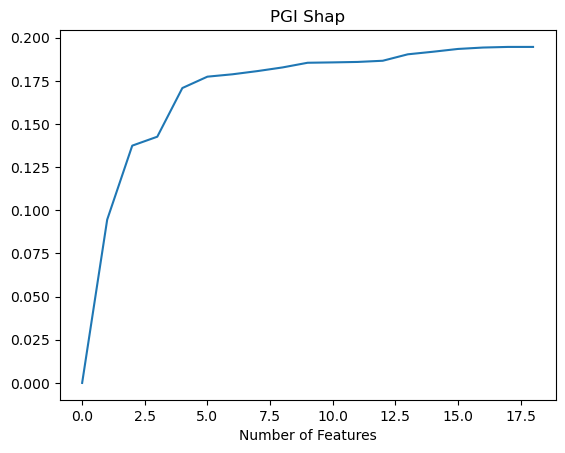

In [13]:
# calculate AUC for PGI
from sklearn.metrics import auc
import matplotlib.pyplot as plt
plt.plot(PGI_shap)
plt.xlabel('Number of Features')
plt.title("PGI Shap")

In [14]:
auc(np.arange(len(shap_list)), PGI_shap[:18])	

2.876776549965143

In [15]:
lime_list = ['wind_speed',
 'track_distance',
 'rwi',
 'rainfall_max_6h',
 'percent_houses_damaged_5years',
 'rainfall_max_24h',
 'urban',
 'mean_elev',
 'coast_length',
 'rural',
 'std_slope',
 'total_pop',
 'water',
 'mean_tri',
 'total_houses',
 'std_tri',
 'with_coast',
 'mean_slope']

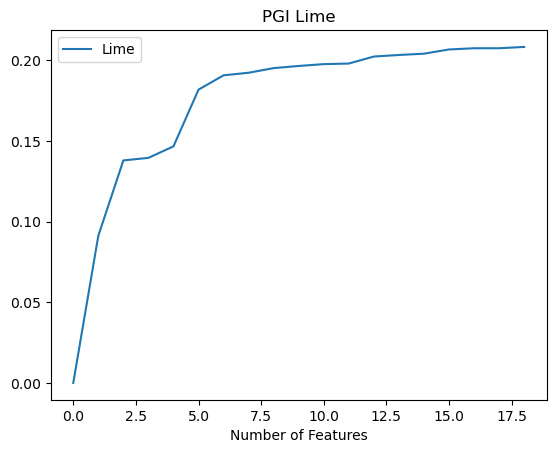

In [16]:
PGI_list = []
for k in range(len(lime_list)+1):
    p = PGI(X_train, model, lime_list[:k], 0, std_spec=0.1, seed = 0)
    PGI_list.append(p)

from sklearn.metrics import auc
import matplotlib.pyplot as plt
plt.plot(PGI_list, label = 'Lime')
plt.xlabel('Number of Features')
plt.title("PGI Lime")
plt.legend()

In [17]:
# calculate AUC for PGI
auc(np.arange(len(lime_list)), PGI_list[:18])	

2.995212387293577

In [18]:
def auc_PGI(feature_list, data, model, mean = 0, std_fix = 0, std_spec = 0, seed=None, label = None):
    PGI_list = []
    for k in range(len(feature_list)):
        p = PGI(data, model, feature_list[:k], mean, std_fix = std_fix, std_spec = std_spec, seed=None)
        PGI_list.append(p)
    a = (auc(range(len(PGI_list)), PGI_list))
    plt.plot(PGI_list, label = "{} (AUC: {:.3f})".format(label, a))
    plt.xlabel('Number of Features')
    if label:
        plt.legend()

    

In [22]:
from model_function import Load_Model
X_test_n = Load_Model("X_test_n")
print(X_test_n)
print(X_test)

[[1.93660323e-01 7.13175264e-01 7.95567461e-03 ... 0.00000000e+00
  6.80445593e-03 1.86526757e-02]
 [6.11094027e-01 1.50057632e-01 2.04045660e-03 ... 0.00000000e+00
  1.27230014e-03 0.00000000e+00]
 [2.04476467e-01 5.29078782e-01 9.27071360e-03 ... 2.00000000e-02
  8.94098418e-03 1.04288911e-02]
 ...
 [4.49783572e-01 9.79600857e-02 1.05569021e-02 ... 6.00000000e-02
  7.90184233e-03 0.00000000e+00]
 [6.42708734e-01 2.53910480e-01 1.55335596e-02 ... 0.00000000e+00
  1.61497554e-02 2.10292849e-03]
 [2.66531580e-01 8.67400946e-01 2.10497973e-05 ... 9.10000000e-01
  1.20172318e-04 0.00000000e+00]]
      wind_speed  track_distance  total_houses  rainfall_max_6h  \
0      -0.553965        0.824593     -0.108198        -0.563647   
1       1.939999       -1.197963     -0.230271        -0.701269   
2      -0.489344        0.163372     -0.081059         0.655724   
3      -0.133500       -0.271994     -0.270355        -0.410508   
4       0.362534       -0.947899     -0.047338        -0.949190  

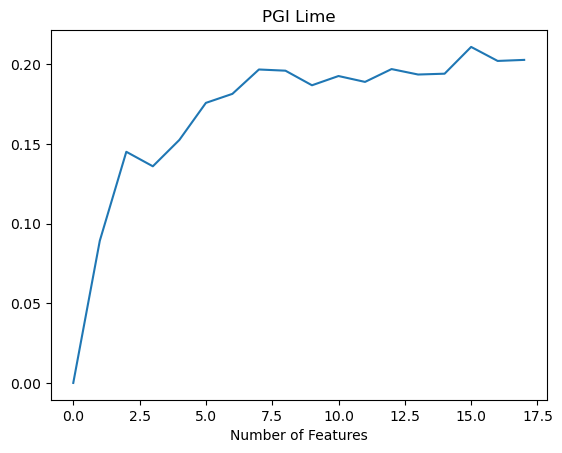

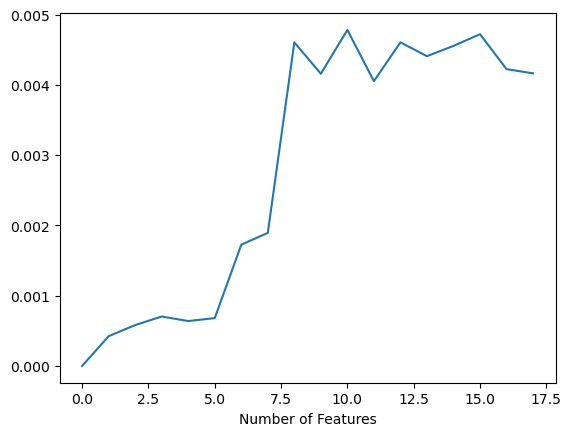

In [23]:
auc_PGI(lime_list, X_test, model, 0, std_spec=0.1, seed = 0)
plt.title("PGI Lime")

plt.figure()

auc_PGI(lime_list, pd.DataFrame(Load_Model("X_test_n"), columns = Load_Model("features")), model, 0, std_spec=0.1, seed = 0)


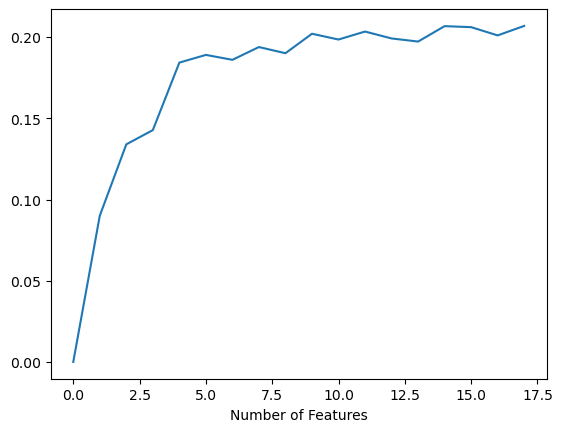

In [27]:
auc_PGI(shap_list, X_train, model, 0, std_spec=0.1, seed = 0)


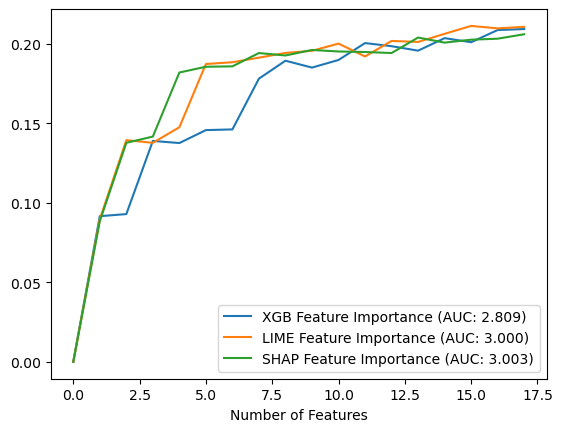

In [28]:
xgb_list = ['wind_speed',
 'std_tri',
 'track_distance',
 'with_coast',
 'rainfall_max_24h',
 'mean_tri',
 'percent_houses_damaged_5years',
 'rainfall_max_6h',
 'mean_slope',
 'std_slope',
 'total_pop',
 'mean_elev',
 'water',
 'total_houses',
 'rural',
 'rwi',
 'coast_length',
 'urban']

auc_PGI(xgb_list, X_train, model, 0, std_spec=0.1, seed = 0, label = "XGB Feature Importance")
auc_PGI(lime_list, X_train, model, 0, std_spec=0.1, seed = 0, label= "LIME Feature Importance")
auc_PGI(shap_list, X_train, model, 0, std_spec=0.1, seed = 0, label= "SHAP Feature Importance")


In [29]:
print(xgb_list)
print(lime_list)
print(shap_list)

['wind_speed', 'std_tri', 'track_distance', 'with_coast', 'rainfall_max_24h', 'mean_tri', 'percent_houses_damaged_5years', 'rainfall_max_6h', 'mean_slope', 'std_slope', 'total_pop', 'mean_elev', 'water', 'total_houses', 'rural', 'rwi', 'coast_length', 'urban']
['wind_speed', 'track_distance', 'rwi', 'rainfall_max_6h', 'percent_houses_damaged_5years', 'rainfall_max_24h', 'urban', 'mean_elev', 'coast_length', 'rural', 'std_slope', 'total_pop', 'water', 'mean_tri', 'total_houses', 'std_tri', 'with_coast', 'mean_slope']
['wind_speed', 'track_distance', 'rainfall_max_6h', 'percent_houses_damaged_5years', 'rainfall_max_24h', 'urban', 'mean_elev', 'coast_length', 'total_houses', 'rwi', 'std_slope', 'mean_slope', 'total_pop', 'mean_tri', 'water', 'rural', 'std_tri', 'with_coast']


<Axes: >

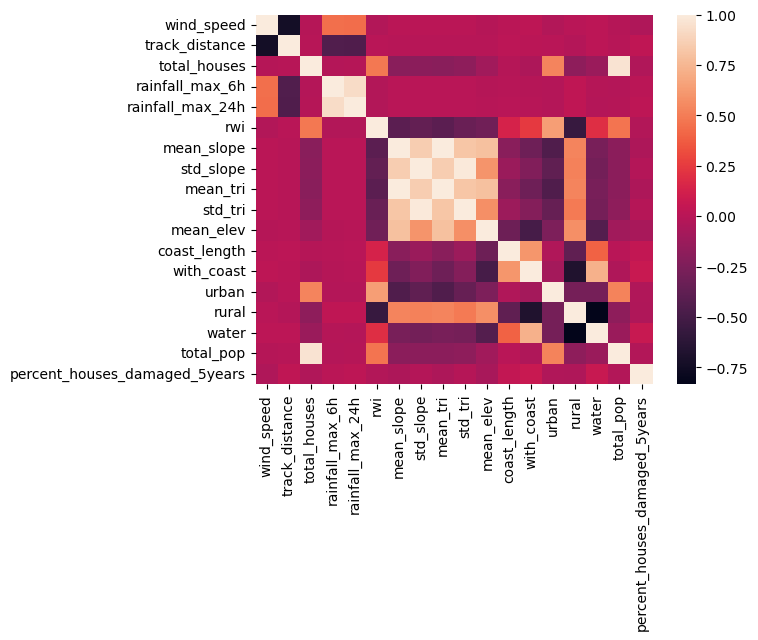

In [31]:
# correlation matrix of features
import seaborn as sns
corr = X_test.corr()
sns.heatmap(corr)